In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### To download the MNIST digit recognition database:


In [6]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

In [7]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [32]:
mnist.keys()
x, y = mnist['data'], mnist['target']

In [9]:
x[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

The MNIST database contains a total of 70000 examples of handwritten digits of size 28x28 pixels, labeled from 0 to 9

In [10]:
x.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
digit=x[36001]
digit_image=digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

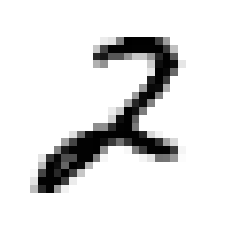

In [13]:
plt.imshow(digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [31]:
y[36001]

'2'

In [15]:
x_train=x[:60000]
x_test=x[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [16]:
shuffle_index=np.random.permutation(60000)
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]

In [17]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)

In [18]:
y_train

array([8, 4, 1, ..., 7, 3, 2], dtype=int8)

##Binary Classifier to detect all 2's

In [19]:
y_train_2=(y_train==2)
y_train_2

array([False, False, False, ..., False, False,  True])

In [20]:
y_test_2=(y_test==2)
y_test_2

array([False,  True, False, ..., False, False, False])

In [21]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(tol=0.1,solver='lbfgs',max_iter=70000)

In [22]:
clf.fit(x_train,y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=70000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [23]:
clf.predict([digit])

array([ True])

In [24]:
clf.predict(x_test[0:10])

array([False,  True, False, False, False, False, False, False, False,
       False])

##Measuring Model Performance (2-detector)
While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. To do this are going to see how the model performs on the new data (test set)

accuracy is defined as:

(fraction of correct predictions): correct predictions / total number of data points

In [25]:
score = clf.score(x_test, y_test_2)
score

0.9795

###CrossValidation

In [26]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_train,y_train_2,cv=5,scoring="accuracy",n_jobs=-1)
a.mean()

0.9784499999999999

#Train the actual model(Mnist)
Next, moving to classify using the Logistic Regression you have to set loss to log.For sufficiently large datasets, it is best to implement SGD Classifier instead of Logistic Classifier to produce similar results in much less time.

In [27]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=42)
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#Model performance (MNIST)

In [57]:
acc = clf.score(x_test,y_test)
acc

0.8824

##Confusion Matrix
It is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

In [60]:
import seaborn as sns
from sklearn import metrics
predictions=clf.predict(x_test)
cm=metrics.confusion_matrix(y_test, predictions)
cm

array([[ 962,    0,    1,    1,    0,    2,    5,    1,    6,    2],
       [   0, 1109,    3,    2,    0,    1,    3,    1,   15,    1],
       [  14,   14,  830,   27,    5,    5,   10,   10,  107,   10],
       [   5,    0,   10,  881,    1,   17,    3,   12,   67,   14],
       [   6,    2,    4,    8,  793,    5,    4,    5,   49,  106],
       [  16,    2,    1,   63,    4,  654,   17,   13,  102,   20],
       [  10,    3,    9,    3,    5,   13,  896,    0,   18,    1],
       [   3,    7,   15,    5,    3,    6,    1,  906,   12,   70],
       [  11,   10,    3,   13,   10,   18,    6,    6,  868,   29],
       [   8,    5,    2,   10,    6,    4,    0,   22,   27,  925]])

##Seaborn

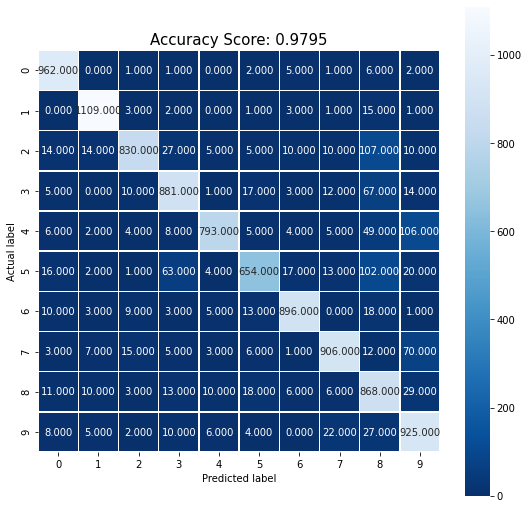

In [62]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {}'.format(score)
plt.title(all_sample_title, size = 15);


##**Display Misclassified Images with predicted Labels**

In [54]:
predictions = clf.predict(x_test)
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

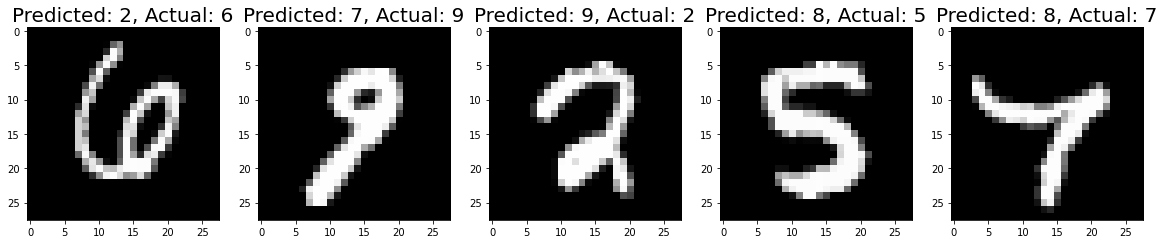

In [56]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)

## **For more detailed explanation refer my github page(index.md) in this repository itself.** 